## Семинар 2 "Распознавание рукописных цифр"

ФИО: 

В этом задании мы используем нейронную сеть из предыдущего семинара для распознавания рукописных цифр. Также мы исследуем как влияет выбор нелинейности и предобработка данных на качество классификации. 

Чтобы не тратить время на подготовку данных, мы прилагаем готовый код с примером использования для получения обучающей и тестовой выборок. Для запуска скрипта вам понадобится библиотека PyTorch (инструкции по установке можно найти на сайте <a href="http://pytorch.org">pytorch.org</a>)

In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
%matplotlib inline

In [133]:
def fnc(*args1, **args2):
    for a in args1:
        print(a)

In [136]:
to_numpy = lambda x: x.numpy()

transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)),
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [137]:
## Usage example:
for X, y in train_loader:
    X = X.view(X.size(0), -1)
    X = X.numpy() ### Converts torch.Tensor to numpy array
    y = y.numpy()
    pass

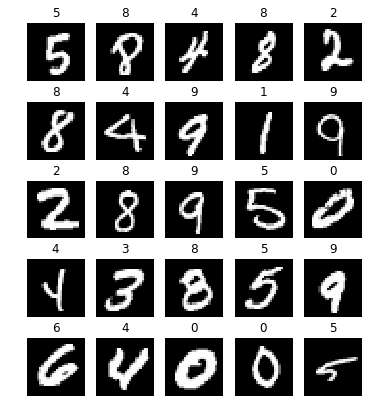

In [118]:
plt.figure(figsize=(6, 7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.title(y[i])
    plt.axis('off')

### Часть 1: MNIST
Обучите полносвязную нейронную сеть с архитектурой 784-100-100-10 и сигмоидой в качестве нелинейности. Какую точность классификации удалось получить? Нарисуйте график сходимости на обучающей и тестовой выборках. В качестве темпа обучения (learning rate) возьмите 0.01

In [15]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%autoreload 2

In [179]:
from net import NeuralNetwork, Sigmoid, Linear, NLLLoss, ReLU, ELU

def train(net, epochs, learning_rate=1e-2, verbose=True):
    losses = []
    accs = []
    for i in range(epochs):
        nll = NLLLoss()
        for j, (X, y) in enumerate(train_loader):
            X = X.view(X.size(0), -1)
            X = X.numpy() ### Converts torch.Tensor to numpy array
            y = y.numpy()
            y_ = nn.forward(X)
            loss = nll.forward(y_, y)
            dLdy = nll.backward()
            nn.backward(dLdy)
            nn.step(1e-2)
            if j % 500 == 0:
                print(j, ': ', loss)
        loss = 0
        acc = 0
        _n = 0
        for X, y in train_loader:
            X = X.view(X.size(0), -1)
            X = X.numpy() ### Converts torch.Tensor to numpy array
            y = y.numpy()
            y_ = nn.forward(X)
            acc += np.mean(np.argmax(y_, axis=1) == y)
            loss += nll.forward(y_, y)
            _n += 1
        loss /= _n
        acc /= _n
        losses.append(loss)
        accs.append(acc)
        print('Test at', i, '. Loss:', loss, 'Accuracy:', acc)
    return net, losses

In [176]:
epochs = 4

nn = NeuralNetwork([
    Linear(784, 30),
    Sigmoid(),
    Linear(30, 10),
])

nn, losses = train(nn, epochs, learning_rate=1e-3)

0 :  2.33519992089
100 :  0.933673570852
200 :  0.55057882038
300 :  0.380093288891
400 :  0.289258326371
500 :  0.367137157808
600 :  0.302159345111
700 :  0.205046695319
800 :  0.143533245843
900 :  0.375683130214
1000 :  0.312680295789
1100 :  0.47621843458
1200 :  0.13217702063
1300 :  0.347979404323
1400 :  0.100112852079
1500 :  0.60291489811
1600 :  0.337680149457
1700 :  0.292379932596
1800 :  0.179114841893
Test at 0 . Loss: 0.196756771381 Accuracy: 0.94395
0 :  0.213844695832
100 :  0.149168635432
200 :  0.0637341085845
300 :  0.0756661359272
400 :  0.152971529109
500 :  0.164715855944
600 :  0.475231764353
700 :  0.454688620959
800 :  0.331003893738
900 :  0.0880082854199
1000 :  0.293758619971
1100 :  0.164723948472
1200 :  0.0839040289556
1300 :  0.410208222878
1400 :  0.287295781299
1500 :  0.157701634783
1600 :  0.117457003982
1700 :  0.717926827053
1800 :  0.0514605111758
Test at 1 . Loss: 0.152262483317 Accuracy: 0.957533333333
0 :  0.132467598068
100 :  0.017651181175

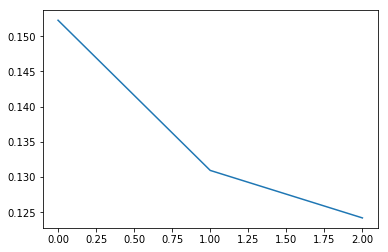

In [177]:
plt.plot(losses[1:])

### Часть 2: Нелинейности

Обучите нейронную сеть с другими нелинейностями: ReLU и ELU. Сравните скорости сходимости и качество классификации с различными функциями активации.

In [180]:
nn = NeuralNetwork([
    Linear(784, 30),
    ELU(),
    Linear(30, 10),
])

nn, losses = train(nn, epochs, learning_rate=1e-2)

0 :  2.32871339593
500 :  0.404414252692
1000 :  1.26362960583
1500 :  0.583621831981
Test at 0 . Loss: 0.466924265078 Accuracy: 0.875716666667
0 :  0.484835879662
500 :  0.295502530065
1000 :  0.31980136903
1500 :  0.281027564676
Test at 1 . Loss: 0.396482576308 Accuracy: 0.9048
0 :  0.232267323061
500 :  0.434973915519
1000 :  0.683846642977
1500 :  0.579633311476
Test at 2 . Loss: 0.295182864692 Accuracy: 0.926566666667
0 :  0.368121832006
500 :  0.138974291528
1000 :  0.851923052562
1500 :  0.624612746111
Test at 3 . Loss: 0.269086777136 Accuracy: 0.934866666667


In [181]:
nn = NeuralNetwork([
    Linear(784, 30),
    ReLU(),
    Linear(30, 10),
])

nn, losses = train(nn, epochs, learning_rate=1e-2)

0 :  2.38384498919
500 :  0.297037682725
1000 :  0.244623025886
1500 :  0.442816087454
Test at 0 . Loss: 0.25273128394 Accuracy: 0.927516666667
0 :  0.135038967173
500 :  0.22680675861
1000 :  0.152801399485
1500 :  0.156118156598
Test at 1 . Loss: 0.217823659956 Accuracy: 0.940583333333
0 :  0.484854933073
500 :  0.283837480694
1000 :  0.338051734918
1500 :  0.710148158666
Test at 2 . Loss: 0.203036556733 Accuracy: 0.9451
0 :  0.398574500935
500 :  0.205154262767
1000 :  0.51066375453
1500 :  0.141243295796
Test at 3 . Loss: 0.181175047351 Accuracy: 0.950566666667


### Часть 3: Предобработка данных

Посчитайте на всей обучающей выборке матрицу ковариации и среднее. Нормализуйте данные по схеме: вычесть среднее, декоррелировать, нормировать дисперсию. Сравните графики обучения на одной и той же архитектуре с и без предобработки.

In [191]:
full_x = np.empty((1875 * 32, 784))

# print(len(train_loader))

for i, (X, _) in enumerate(train_loader):
    X = X.view(X.size(0), -1)
    X = X.numpy()
    full_x[i:i+32] = X

In [204]:
cov_x = np.dot(full_x.T, full_x) / full_x.shape[0]

In [205]:
from scipy import linalg
decorrel = scipy.linalg.sqrtm(np.linalg.inv(cov_x + np.eye(cov_x.shape[0]))).real

In [208]:
def train(net, epochs, learning_rate=1e-2, verbose=True):
    losses = []
    accs = []
    for i in range(epochs):
        nll = NLLLoss()
        for j, (X, y) in enumerate(train_loader):
            X = X.view(X.size(0), -1)
            X = X.numpy() ### Converts torch.Tensor to numpy array
            y = y.numpy()
            X = np.dot(decorrel, X.T).T # np.dot(X, decorrel.T)
            y_ = nn.forward(X)
            loss = nll.forward(y_, y)
            dLdy = nll.backward()
            nn.backward(dLdy)
            nn.step(1e-2)
            if j % 500 == 0:
                print(j, ': ', loss)
        loss = 0
        acc = 0
        _n = 0
        for X, y in train_loader:
            X = X.view(X.size(0), -1)
            X = X.numpy() ### Converts torch.Tensor to numpy array
            y = y.numpy()
            X = np.dot(decorrel, X.T).T # np.dot(X, decorrel.T)
            y_ = nn.forward(X)
            acc += np.mean(np.argmax(y_, axis=1) == y)
            loss += nll.forward(y_, y)
            _n += 1
        loss /= _n
        acc /= _n
        losses.append(loss)
        accs.append(acc)
        print('Test at', i, '. Loss:', loss, 'Accuracy:', acc)
    return net, losses

In [209]:
epochs = 4

nn = NeuralNetwork([
    Linear(784, 30),
    Sigmoid(),
    Linear(30, 10),
])

nn, losses = train(nn, epochs, learning_rate=1e-3)

0 :  2.33558753295
500 :  0.213277347409
1000 :  0.149198761602
1500 :  0.0660924924214
Test at 0 . Loss: 0.188992764201 Accuracy: 0.949083333333
0 :  0.108603233369
500 :  0.0822981819541
1000 :  0.0556449776643
1500 :  0.070655693687
Test at 1 . Loss: 0.147660401 Accuracy: 0.958316666667
0 :  0.0653009372384
500 :  0.129177872379
1000 :  0.100280808537
1500 :  0.12759426599
Test at 2 . Loss: 0.124477652456 Accuracy: 0.964866666667
0 :  0.244714432974
500 :  0.0434745813934
1000 :  0.0751691053181
1500 :  0.157901441009
Test at 3 . Loss: 0.108906571462 Accuracy: 0.969266666667


### Часть 4: Выводы
Опишите полученные результаты: как влияют выбор нелинейности и предобработка данных на скорость сходимости и итоговое качество?